In [27]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data preparation

In [28]:
df = pd.read_csv('data.csv')
len(df)

11914

In [29]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [30]:
df.columns.str.lower().str.replace(' ','_')


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [31]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

# dtype object is a string
# we get the indices of all columns of dtype object
str_columns = list(df.dtypes[df.dtypes=='object'].index)


for col in str_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [32]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [33]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

## Exploratory data analysis

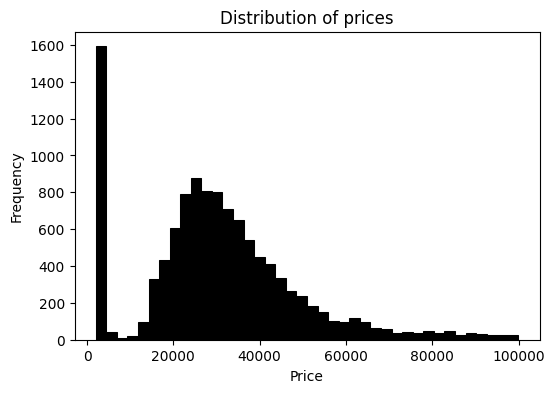

In [34]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp<100000], bins=40, color='black', alpha=1)

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

<Axes: xlabel='msrp', ylabel='Count'>

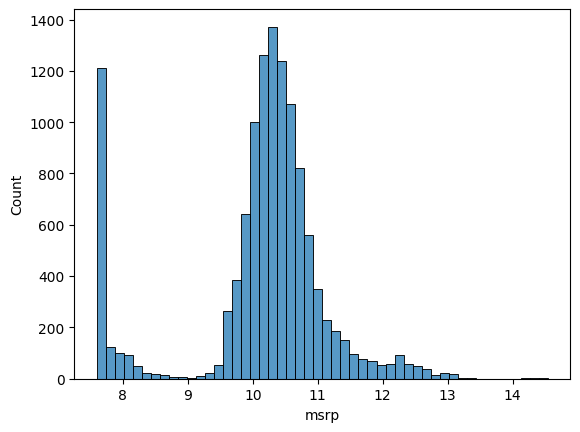

In [35]:
sns.histplot(np.log1p(df.msrp),bins = 50)

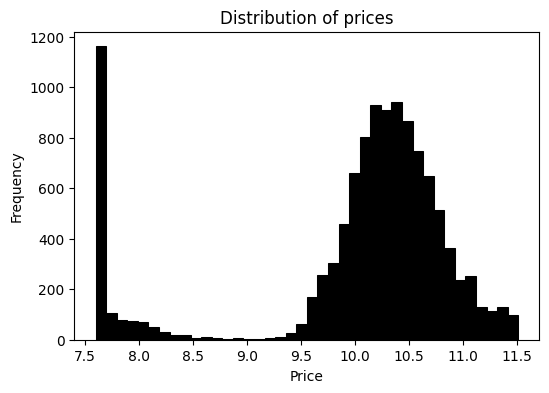

In [36]:
plt.figure(figsize=(6, 4))

sns.histplot(np.log1p(df.msrp[df.msrp < 100000]), bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

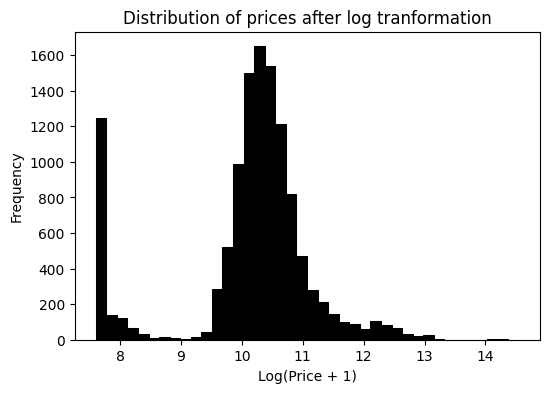

In [37]:
log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [38]:
#Missing values

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [39]:
df.fillna(0, inplace=True)

df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

# Expoloring the relationships between variables


In [40]:
#df_numerical.columns

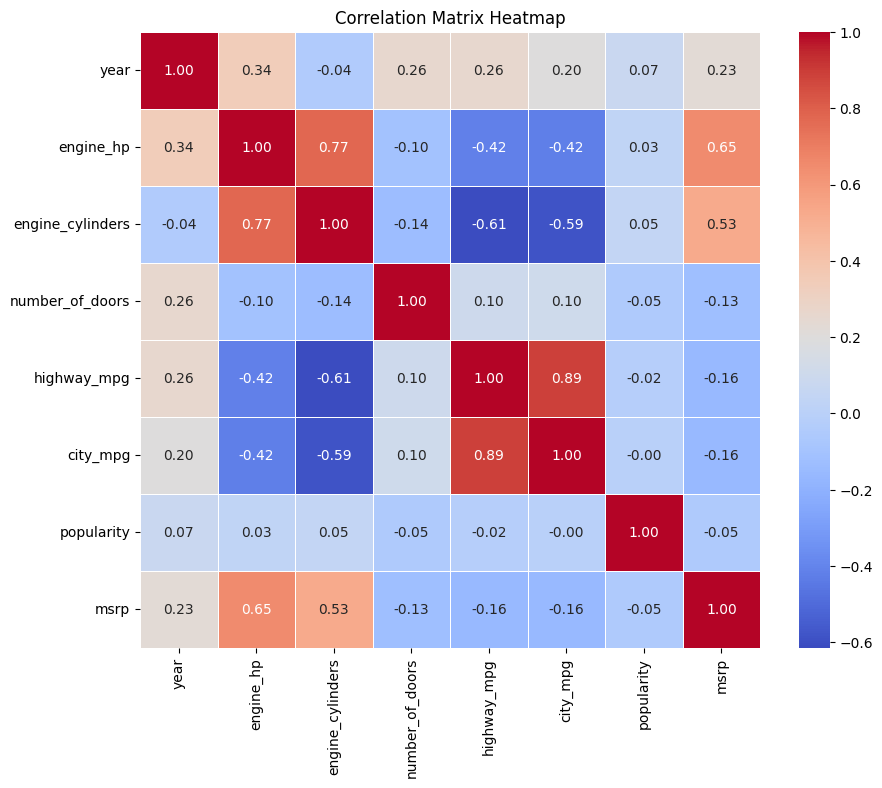

In [41]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Validation framework

In [42]:
n = len(df)
n_train = int(n*0.6)
n_val = int(n*0.2)
n_test = n - n_train - n_val


In [43]:
np.random.seed(2)
#shuffle the indices
indx= np.random.permutation(n)
print(indx)

[2735 6720 5878 ... 6637 2575 7336]


In [44]:
# split the data into train, validation and test sets
# first n_train rows for training, next n_val rows for validation, rest for testing

df_train = df.iloc[indx[:n_train]]
df_val= df.iloc[indx[n_train:n_train+n_val]]
df_test= df.iloc[indx[n_train+n_val:]]



In [45]:
# reset the indices 

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)          
df_test = df_test.reset_index(drop=True)

In [46]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,0,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,0,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [47]:
df_val.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300
1,volkswagen,cc,2017,premium_unleaded_(recommended),200.0,4.0,automated_manual,front_wheel_drive,4.0,performance,midsize,sedan,31,22,873,37820
2,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,0,compact,extended_cab_pickup,25,19,1385,26885
3,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775


In [48]:
df_test.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,0,compact,sedan,34,24,436,17595
1,kia,sorento,2015,regular_unleaded,290.0,6.0,automatic,front_wheel_drive,4.0,crossover,midsize,4dr_suv,25,18,1720,26700
2,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,0,compact,cargo_van,20,15,549,2000
3,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
4,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120


In [ ]:
# Set the tartget variable for training and validation sets

y_train = df_train['msrp'].values
y_val = df_val['msrp'].values
y_test = df_test['msrp'].values

#Transform the target variable using log transformation
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

In [50]:
# Remove the target variable from the training and validation sets
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']



In [51]:
(df_train.columns,df_val.columns,df_test.columns)

(Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
        'engine_cylinders', 'transmission_type', 'driven_wheels',
        'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
        'highway_mpg', 'city_mpg', 'popularity'],
       dtype='object'),
 Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
        'engine_cylinders', 'transmission_type', 'driven_wheels',
        'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
        'highway_mpg', 'city_mpg', 'popularity'],
       dtype='object'),
 Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
        'engine_cylinders', 'transmission_type', 'driven_wheels',
        'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
        'highway_mpg', 'city_mpg', 'popularity'],
       dtype='object'))

np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

# creates list of indices and shuffles them
idx = np.arange(n)
np.random.shuffle(idx)

# shuffled dataframe
df_shuffled = df.iloc[idx]

# splitting the dataframe into our train/val/test splits

df_train = df_shuffled.iloc[:n_train].copy()

df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()

df_test = df_shuffled.iloc[n_train+n_val:].copy()

# obtain the feature we want to work with (MSRP) and transform it
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

# we remove the extracted feature from the dataset because we will use the other features for training and we don't want to accidentally use our target feature for training.
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## Linear Regression

In [52]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [53]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    # we return the bias term and the weights separately
    return w[0], w[1:]

## Baseline solution

In [54]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [55]:
def prepare_X(df):
    
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [56]:
# Prepare the training data
X_train = prepare_X(df_train)
# Train the linear regression model
w_0, w = train_linear_regression(X_train, y_train)
# Make predictions on the training set
# y_pred = w_0 + X_train.dot(w) --- IGNORE ---
# Display the first 5 predictions
y_pred = w_0 + X_train.dot(w)
(y_pred[:5])

array([ 9.5479597 ,  9.38746219,  9.67184806,  8.65471955, 10.86586728])

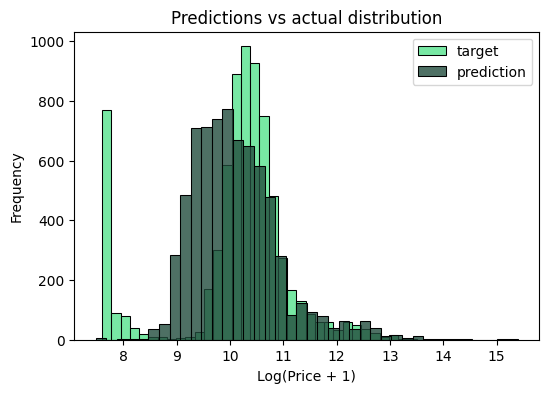

In [59]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color="#1FDA67", alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color="#224c3d", alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
#plt.xlim(0.0, 0.5E+6) 
#plt.ylim(0.0,2000) 
plt.title('Predictions vs actual distribution')

plt.show()

In [60]:
#Evaluation matric

def rmse(y, pred):
    error = pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [61]:
# Prepare the validation data
X_val = prepare_X(df_val)
# Train the linear regression model
w_0, w = train_linear_regression(X_val, y_val)
# Make predictions on the training set
# y_pred = w_0 + X_train.dot(w) --- IGNORE ---
# Display the first 5 predictions
y_pred_val = w_0 + X_val.dot(w)
(y_pred_val[:5])


array([12.12286371, 10.05432069,  9.77282776, 10.29333843,  9.88799484])

In [62]:
y_pred_val.shape
#y_val.shape

(2382,)

In [63]:
# Evaluating the model:

print('RMSE train', rmse(y_train, y_pred))


print('RMSE validation', rmse(y_val, y_pred_val))

RMSE train 0.7554591756909307
RMSE validation 0.751127926574924


## Simple feature engineering

In [64]:
def prepare_X(df):
    df = df.copy() # create a copy to avoid modifying the original dataframe
    df = df.fillna(0)
    features = base.copy()
    #New feature : age of the car
    df['age'] = df['year'].max() - df.year
    # Append the new feature to the list of features
    features.append('age')
    

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [67]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

print('RMSE train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
w_0, w = train_linear_regression(X_val, y_val)
y_pred_val = w_0 + X_val.dot(w)
print('RMSE validation', rmse(y_val, y_pred_val))

RMSE train 0.5175461085504556
RMSE validation 0.5152472240395481


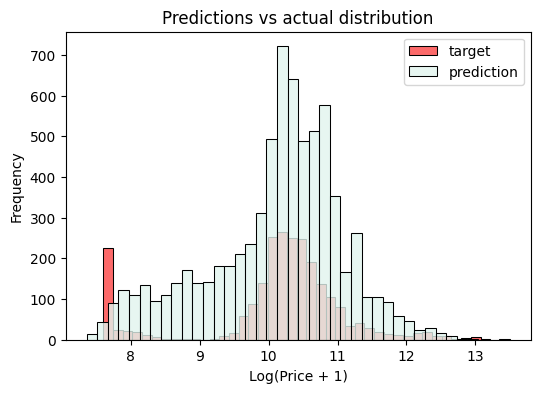

In [77]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color="#FA0707", alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color="#e1f4ee", alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
#plt.xlim(0.0, 0.2E+6) 
#plt.ylim(0.0,900) 
plt.title('Predictions vs actual distribution')

plt.show()

In [78]:
df['make'].value_counts().head()

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [79]:
df['number_of_doors'].value_counts()


number_of_doors
4.0    8353
2.0    3160
3.0     395
0.0       6
Name: count, dtype: int64

In [80]:
counts = df.groupby(['make', 'number_of_doors']).size().reset_index(name='count')
print(counts)

            make  number_of_doors  count
0          acura              2.0     48
1          acura              4.0    204
2     alfa_romeo              2.0      5
3   aston_martin              2.0     86
4   aston_martin              4.0      7
..           ...              ...    ...
94    volkswagen              2.0    306
95    volkswagen              3.0     17
96    volkswagen              4.0    486
97         volvo              2.0     12
98         volvo              4.0    269

[99 rows x 3 columns]


# Ploting correlation matrix

In [81]:

df_numerical = df.select_dtypes(include='number')
df_numerical['age'] = df['year'].max() - df['year']
correlation_matrix  = df_numerical.corr()


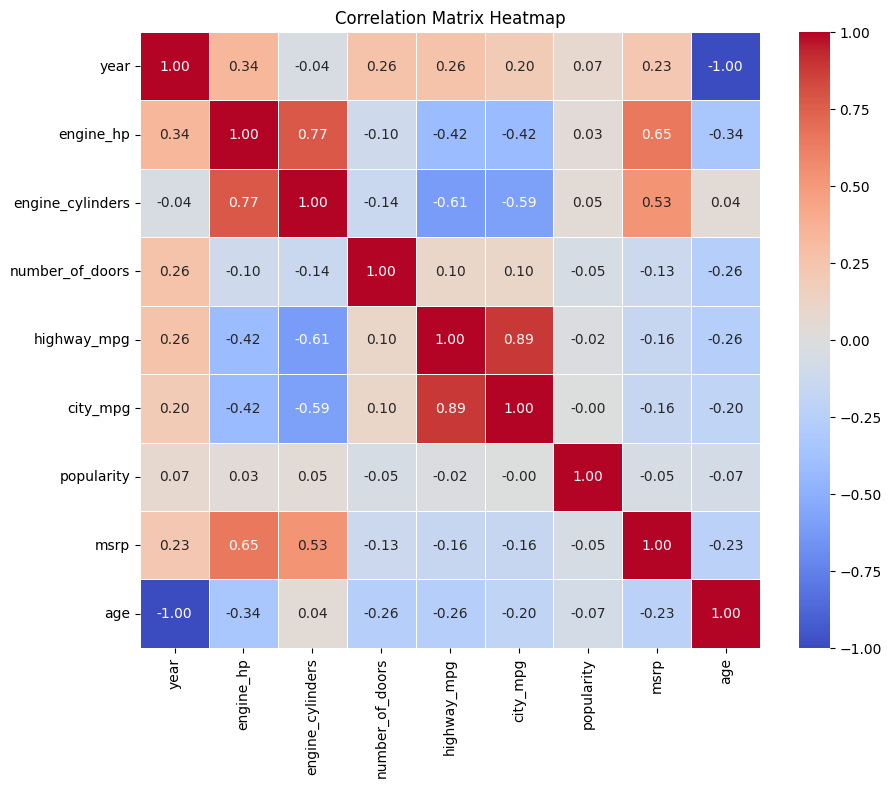

In [82]:

plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [83]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = df['year'].max() - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [84]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.505930401897355
validation: 0.5074572881972271


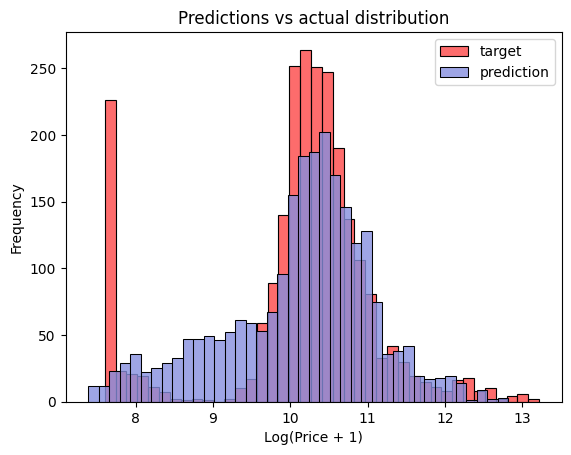

In [86]:
sns.histplot(y_val, label='target', color="#FD0B0BFF", alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color="#868fdf19", alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')

plt.title('Predictions vs actual distribution')

plt.show()

In [87]:
df['engine_fuel_type'].value_counts()

engine_fuel_type
regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
0                                                  3
natural_gas                                        2
Name: count, dtype: int64

In [88]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [89]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4789034925604403
validation: 0.4747016023881793


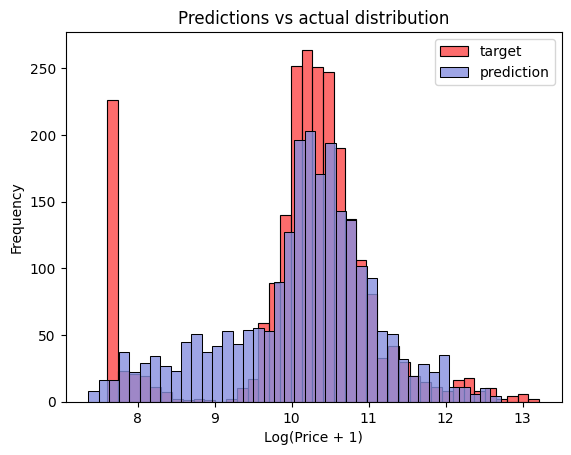

In [91]:


sns.histplot(y_val, label='target', color="#FD0B0BFF", alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color="#868fdf19", alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [92]:
df['transmission_type'].value_counts()

transmission_type
automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: count, dtype: int64

In [93]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [94]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.47458621955744734
validation: 0.46852436732541114


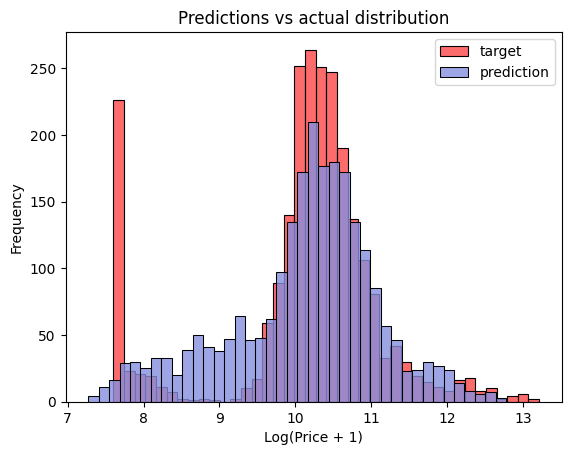

In [95]:


sns.histplot(y_val, label='target', color="#FD0B0BFF", alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color="#868fdf19", alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')

plt.title('Predictions vs actual distribution')

plt.show()

In [96]:
df['driven_wheels'].value_counts()

driven_wheels
front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: count, dtype: int64

In [97]:
df['market_category'].value_counts().head(5)

market_category
0                     3742
crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
Name: count, dtype: int64

In [98]:
df['vehicle_size'].value_counts().head(5)

vehicle_size
compact    4764
midsize    4373
large      2777
Name: count, dtype: int64

In [99]:
type(df['vehicle_style'].value_counts())

pandas.core.series.Series

In [100]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [101]:
d = {'m':[1,2,3],'l':[4,5,6]}

for key, value in d.items():
    
    #print(key, value)
    for v in value:
        print('%s_%s' % (key, v))
        # do something with the key and value   

m_1
m_2
m_3
l_4
l_5
l_6


In [102]:
df_categories = df.select_dtypes(include='object')
categories = list(df_categories.columns)

cat ={}
for key, value in df_categories.items():
    cat[key] = value.unique().tolist()
for key, value in cat.items():
    print(key, value)
  

make ['bmw', 'audi', 'fiat', 'mercedes-benz', 'chrysler', 'nissan', 'volvo', 'mazda', 'mitsubishi', 'ferrari', 'alfa_romeo', 'toyota', 'mclaren', 'maybach', 'pontiac', 'porsche', 'saab', 'gmc', 'hyundai', 'plymouth', 'honda', 'oldsmobile', 'suzuki', 'ford', 'cadillac', 'kia', 'bentley', 'chevrolet', 'dodge', 'lamborghini', 'lincoln', 'subaru', 'volkswagen', 'spyker', 'buick', 'acura', 'rolls-royce', 'maserati', 'lexus', 'aston_martin', 'land_rover', 'lotus', 'infiniti', 'scion', 'genesis', 'hummer', 'tesla', 'bugatti']
model ['1_series_m', '1_series', '100', '124_spider', '190-class', '2_series', '200', '200sx', '240sx', '240', '2', '3_series_gran_turismo', '3_series', '300-class', '3000gt', '300', '300m', '300zx', '323', '350-class', '350z', '360', '370z', '3', '4_series_gran_coupe', '4_series', '400-class', '420-class', '456m', '458_italia', '4c', '4runner', '5_series_gran_turismo', '5_series', '500-class', '500e', '500', '500l', '500x', '550', '560-class', '570s', '575m', '57', '599

def prepare_all_with_featureX(df):
    df = df.copy()
    features = base.copy()
    df_categories = df.select_dtypes(include='object')
    categories = list(df_categories.columns)

    cat ={}

    df['age'] =df['year'].max() - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)


    for c in df_categories.items():
        cat[key] = value.unique().tolist()
    for key, value in cat.items():
        for v in value:
            feature = '%s_%s' % (key, v)
            df[feature] = (df[key] == v).astype(int)
            features.append(feature)

    df_num = df[features]

    df_num = df_num.fillna(0)

    X = df_num.values

    return X

In [103]:
df_categories = df.select_dtypes(include='object')
categories = list(df_categories.columns)
cat ={}
for c in categories:
        cat[c] = list(df[c].value_counts().head().index)
cat
        


{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500',
  'tundra',
  'f-150',
  'sierra_1500',
  'beetle_convertible'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': [0,
  'crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [104]:
def prepare_all_with_featureX(df):
    df = df.copy()
    features = base.copy()
    df['age'] =df['year'].max() - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for c,values in cat.items():
        for v in values:
            feature = '%s_%s' %(c,v)
            df[feature] = (df[c] == v).astype(int)
            features.append(feature)

    df_num = df[features]

    df_num = df_num.fillna(0)

    X = df_num.values

    return X

In [107]:
X_val[:1]

array([[563.,  12.,  21.,  13.,  86.,   3.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.]])

In [110]:
X_train = prepare_all_with_featureX(df_train)

w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

print('train:', rmse(y_train, y_pred))

X_val = prepare_all_with_featureX(X_val)

y_pred_val= w_0 + X_val.dot(w)

print('validation:', rmse(y_val, y_pred_val))

train: 29.837563029028278


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [113]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 138.97871325214714
validation: 103.27206215274371


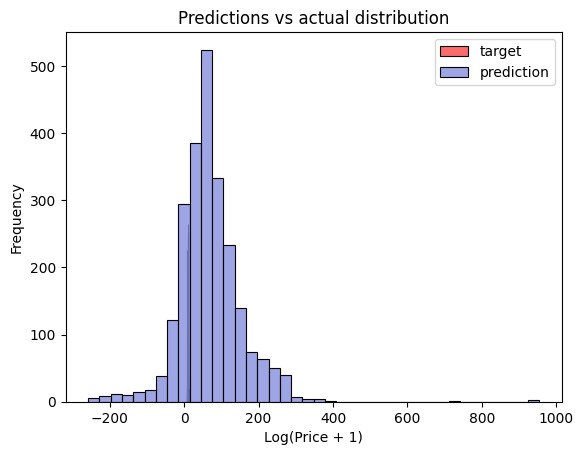

In [114]:
sns.histplot(y_val, label='target', color="#FD0B0BFF", alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color="#868fdf19", alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
 
plt.title('Predictions vs actual distribution')

plt.show()

In [115]:
w_0

np.float64(1.0939270370837908e+16)

# Exploring issues with the gram matrix

In [ ]:
a = [140,11,11];b = [11,108,108];c = [11,108,108]

def lr(x,y,r=0.0):
    x  = np.array([a,b,c])
    xT = x.T
    gram  = xT.dot(x)
    gram_inv = np.linalg.inv(gram)

In [ ]:
T = np.array([a,b,c])
onez = np.ones(T.shape[0])
T = np.column_stack([onez, T])

def gram_matrix(x):
    xT = x.T
    return xT.dot(x)
r = 0.001
reged  = r * np.eye(T.shape[0])
reged
gram = gram_matrix(T)
gram_reged = gram + reged

gram_reged_inv = np.linalg.inv(gram_reged)
y = np.array([1,2,3])


w = gram_reged_inv.dot(T.T).dot(y)

ValueError: operands could not be broadcast together with shapes (4,4) (3,3) 

## Regularisation

In [116]:
def train_linear_regression_reg(X, y, a=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = a* np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [117]:
X_train = prepare_all_with_featureX(df_train)

In [127]:
print('     a,       |w_0,     |w13,     |w21')
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, a=r)
    print('%5s, |%5.2f, |%5.2f, |%5.2f' % (r, w_0, w[13], w[21]))

     a,       |w_0,     |w13,     |w21
    0, |1755601514386149.75, |-1.04, |-22.81
0.001, | 6.31, |-0.13, |-0.29
 0.01, | 6.30, |-0.13, |-0.29
  0.1, | 6.22, |-0.13, |-0.28
    1, | 5.66, |-0.13, |-0.22
   10, | 4.28, |-0.12, | 0.16


In [128]:
X_train = prepare_all_with_featureX(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, a=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_all_with_featureX(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 29.837563029028278
val 25.70135629730248


In [129]:
X_train = prepare_all_with_featureX(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, a=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_all_with_featureX(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.4544974472212899
val 0.45082040475783725


In [136]:
X_train = prepare_all_with_featureX(df_train)
y_pred = w_0 + X_train.dot(w)
y_pred_val = w_0 + X_val.dot(w)

print(' a | Val-rmse |Train-rmse')
print('_________________________')
for a in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, a=a)
    print('%6s | %.2f | %.2f' %(a, rmse(y_val, y_pred_val), rmse(y_train, y_pred)))

 a | Val-rmse |Train-rmse
_________________________
     0 | 0.47 | 0.47
 0.001 | 0.47 | 0.47
  0.01 | 0.47 | 0.47
   0.1 | 0.47 | 0.47
     1 | 0.47 | 0.47
    10 | 0.47 | 0.47


In [143]:
# Prepare the full training data
# This combines the training and validation sets
# to train the model on all available data

import pandas as pd

df_full_train = pd.concat([df_train,df_val])

y_full_train = np.concatenate([y_train, y_val])

X_train = prepare_all_with_featureX(df_full_train)


w_0, w = train_linear_regression_reg(X_train, y_full_train, a=0.01)


y_pred = w_0 + X_train.dot(w)
print('Train', rmse(y_full_train, y_pred))

X_test = prepare_all_with_featureX(df_test)
y_pred_test= w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred_test))

Train 0.45325287139359827
test: 0.44617563072024685


## Using the model

In [144]:
i = 20
car = df_test.iloc[i].to_dict()
car

{'make': 'gmc',
 'model': 'sierra_1500',
 'year': 2016,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 355.0,
 'engine_cylinders': 8.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'four_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 0,
 'vehicle_size': 'large',
 'vehicle_style': 'crew_cab_pickup',
 'highway_mpg': 22,
 'city_mpg': 16,
 'popularity': 549}

In [151]:
X_car = prepare_all_with_featureX(pd.DataFrame([car]))
y_pred = w_0 + X_car.dot(w)
suggestion = np.expm1(y_pred)
suggestion

array([55564.81763443])

In [155]:
np.expm1(y_test[20])


np.float64(54240.00000000002)

In [156]:
diference = suggestion - np.expm1(y_test[20])
diference

array([1324.81763443])